In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/fashion_dataset.csv")
data.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,...,link,ratings,review,Month,Price (USD),user_id1,user_id2,user_id3,user_id4,user_id5
0,8493,Women,Apparel,Bottomwear,Skirts,Black,Fall,2011.0,Casual,Forever New Women Black Skirts,...,http://assets.myntassets.com/v1/images/style/p...,5,Amazing quality! Definitely recommend. Would r...,November,46,93810,67912,12506,31747,17972
1,30757,Men,Apparel,Topwear,Kurtas,Grey,Summer,2012.0,Ethnic,Fabindia Men Grey Mangalgiri Kurta,...,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy..",September,29,24592,54541,98358,62538,23573
2,14881,Women,Accessories,Bags,Handbags,Black,Summer,2011.0,Casual,United Colors of Benetton Women Solid Black Ha...,...,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special.!",October,39,13278,34966,71797,93928,90931
3,48449,Men,Apparel,Topwear,Tshirts,Blue,Summer,2012.0,Casual,French Connection Men Blue T-shirt,...,http://assets.myntassets.com/v1/images/style/p...,5,"Comfortable and stylish, worth the price. and ...",August,39,46048,40972,76426,52622,68556
4,4697,Unisex,Accessories,Watches,Watches,Black,Winter,2016.0,Sports,ADIDAS Unisex Digital Duramo Black Watch,...,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy.!",March,33,42098,58790,98835,49226,67898


In [ ]:
catnames = [ 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season','usage','Month']
numnames = ['id','year','ratings','Price (USD)']

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
df_encoded = data.copy()
le_dict = {}

for col in catnames:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(data[col])
    le_dict[col] = le

print("Encoded DataFrame:")
print(df_encoded)

subcategory_mapping = {label: idx for label, idx in zip(le_dict['subCategory'].classes_, le_dict['subCategory'].transform(le_dict['subCategory'].classes_))}
decode_mapping = {idx: label for idx, label in zip(le_dict['subCategory'].transform(le_dict['subCategory'].classes_),le_dict['subCategory'].classes_)}
masterCategory_mapping = {label: idx for label, idx in zip(le_dict['masterCategory'].classes_, le_dict['masterCategory'].transform(le_dict['masterCategory'].classes_))}
gender_mapping = {label: idx for label, idx in zip(le_dict['gender'].classes_, le_dict['gender'].transform(le_dict['gender'].classes_))}
colour_mapping = {label: idx for label, idx in zip(le_dict['baseColour'].classes_, le_dict['baseColour'].transform(le_dict['baseColour'].classes_))}

print("Subcategory Mapping (Original to Encoded):", subcategory_mapping)
print("Decoded Subcategory Mapping (Encoded to Original):", decode_mapping)
print("Master Category Mapping (Original to Encoded):", masterCategory_mapping)
print("Gender Mapping (Original to Encoded):", gender_mapping)
print("Colour Mapping (Original to Encoded):", colour_mapping)

Encoded DataFrame:
          id  gender  masterCategory  subCategory  articleType  baseColour  \
0       8493       4               1            2           53           1   
1      30757       2               1           10           25          13   
2      14881       4               0            0           19           1   
3      48449       2               1           10           71           2   
4       4697       3               0           12           76           1   
...      ...     ...             ...          ...          ...         ...   
36479  45378       4               2            8           16           1   
36480   8219       3               0            0            1          33   
36481  35177       3               0            0            1           1   
36482   8673       2               0            3           58           1   
36483   5864       3               2            8            9          25   

       season    year  usage  \
0           

In [ ]:
df_encoded.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,...,link,ratings,review,Month,Price (USD),user_id1,user_id2,user_id3,user_id4,user_id5
0,8493,4,1,2,53,1,0,2011.0,0,Forever New Women Black Skirts,...,http://assets.myntassets.com/v1/images/style/p...,5,Amazing quality! Definitely recommend. Would r...,9,46,93810,67912,12506,31747,17972
1,30757,2,1,10,25,13,2,2012.0,1,Fabindia Men Grey Mangalgiri Kurta,...,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy..",11,29,24592,54541,98358,62538,23573
2,14881,4,0,0,19,1,2,2011.0,0,United Colors of Benetton Women Solid Black Ha...,...,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special.!",10,39,13278,34966,71797,93928,90931
3,48449,2,1,10,71,2,2,2012.0,0,French Connection Men Blue T-shirt,...,http://assets.myntassets.com/v1/images/style/p...,5,"Comfortable and stylish, worth the price. and ...",1,39,46048,40972,76426,52622,68556
4,4697,3,0,12,76,1,3,2016.0,5,ADIDAS Unisex Digital Duramo Black Watch,...,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy.!",7,33,42098,58790,98835,49226,67898


In [ ]:
# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded[['ratings', 'Price (USD)','year']])
scaled_df = pd.DataFrame(scaled_features, columns=['ratings', 'Price (USD)','year'])

processed_dataset = pd.concat([df_encoded[['id', 'gender', 'masterCategory', 'subCategory', 'articleType','baseColour', 'season', 'usage', 'productDisplayName', 'Month',]],scaled_df], axis=1)
processed_dataset

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,Month,ratings,Price (USD),year
0,8493,4,1,2,53,1,0,0,Forever New Women Black Skirts,9,1.093309,1.075171,-0.785477
1,30757,2,1,10,25,13,2,1,Fabindia Men Grey Mangalgiri Kurta,11,0.311906,-0.426540,-0.248118
2,14881,4,0,0,19,1,2,0,United Colors of Benetton Women Solid Black Ha...,10,-0.469497,0.456819,-0.785477
3,48449,2,1,10,71,2,2,0,French Connection Men Blue T-shirt,1,1.093309,0.456819,-0.248118
4,4697,3,0,12,76,1,3,5,ADIDAS Unisex Digital Duramo Black Watch,7,0.311906,-0.073196,1.901317
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36479,45378,4,2,8,16,1,2,0,Rocia Women Black Sandals,9,1.093309,1.251843,-0.248118
36480,8219,3,0,0,1,33,3,0,Fastrack Unisex Navy Red Single Strap Backpack,3,0.311906,-0.691547,1.901317
36481,35177,3,0,0,1,1,2,0,Wildcraft Unisex Black Backpack,1,-2.032303,0.545155,1.363958
36482,8673,2,0,3,58,1,3,0,Fastrack Men metal rim Black Sunglasses,7,-2.032303,-0.338204,1.901317


In [ ]:
processed_dataset.head()

In [ ]:
data.reset_index(drop=True, inplace=True)
processed_dataset.reset_index(drop=True, inplace=True)

processed_dataset['user_id1'] = data['user_id1']
processed_dataset['user_id2'] = data['user_id2']
processed_dataset['user_id3'] = data['user_id3']
processed_dataset['user_id4'] = data['user_id4']
processed_dataset['user_id5'] = data['user_id5']
processed_dataset

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,Month,ratings,Price (USD),year,user_id1,user_id2,user_id3,user_id4,user_id5
0,8493,4,1,2,53,1,0,0,Forever New Women Black Skirts,9,1.093309,1.075171,-0.785477,93810,67912,12506,31747,17972
1,30757,2,1,10,25,13,2,1,Fabindia Men Grey Mangalgiri Kurta,11,0.311906,-0.426540,-0.248118,24592,54541,98358,62538,23573
2,14881,4,0,0,19,1,2,0,United Colors of Benetton Women Solid Black Ha...,10,-0.469497,0.456819,-0.785477,13278,34966,71797,93928,90931
3,48449,2,1,10,71,2,2,0,French Connection Men Blue T-shirt,1,1.093309,0.456819,-0.248118,46048,40972,76426,52622,68556
4,4697,3,0,12,76,1,3,5,ADIDAS Unisex Digital Duramo Black Watch,7,0.311906,-0.073196,1.901317,42098,58790,98835,49226,67898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36479,45378,4,2,8,16,1,2,0,Rocia Women Black Sandals,9,1.093309,1.251843,-0.248118,40311,89887,99381,99037,40828
36480,8219,3,0,0,1,33,3,0,Fastrack Unisex Navy Red Single Strap Backpack,3,0.311906,-0.691547,1.901317,93769,24371,54252,51688,65026
36481,35177,3,0,0,1,1,2,0,Wildcraft Unisex Black Backpack,1,-2.032303,0.545155,1.363958,77537,28340,12456,73646,67438
36482,8673,2,0,3,58,1,3,0,Fastrack Men metal rim Black Sunglasses,7,-2.032303,-0.338204,1.901317,80371,46528,37681,95649,31566


In [ ]:
complementary_map = {
    'Topwear': ['Bottomwear', 'Flip Flops','Shoes', 'Jewellery', 'Eyewear', 'Belts', 'Bags', 'Watches', 'Wallets'],
    'Bottomwear': ['Topwear', 'Shoes', 'Flip Flops', 'Bags', 'Belts', 'Watches', 'Wallets'],
    'Bags': ['Topwear', 'Bottomwear', 'Shoes', 'Watches', 'Jewellery', 'Eyewear'],
    'Watches': ['Topwear', 'Bottomwear', 'Bags', 'Shoes', 'Jewellery'],
    'Shoes': ['Topwear', 'Bottomwear', 'Socks', 'Eyewear', 'Belts'],
    'Flip Flops': ['Topwear', 'Bottomwear', 'Socks', 'Belts', 'Eyewear'],
    'Jewellery': ['Topwear', 'Bottomwear', 'Saree', 'Watches', 'Eyewear'],
    'Eyewear': ['Topwear', 'Bottomwear', 'Shoes', 'Jewellery'],
    'Belts': ['Topwear', 'Bottomwear', 'Shoes', 'Flip Flops', 'Watches'],
    'Saree': ['Jewellery', 'Bags', 'Flip Flops','Shoes'],
    'Loungewear and Nightwear': ['Bottomwear', 'Socks'],
    'Wallets': ['Topwear', 'Bottomwear', 'Bags', 'Watches'],
    'Socks': ['Shoes', 'Flip Flops', 'Loungewear and Nightwear']
}

encoded_complementary_map = {
    subcategory_mapping[original]: [subcategory_mapping[comp] for comp in complements if comp in subcategory_mapping]
    for original, complements in complementary_map.items() if original in subcategory_mapping
}

print("Encoded Complementary Map:", encoded_complementary_map)

len('Topwear')

Encoded Complementary Map: {10: [2, 4, 8, 5, 3, 1, 0, 12, 11], 2: [10, 8, 4, 0, 1, 12, 11], 0: [10, 2, 8, 12, 5, 3], 12: [10, 2, 0, 8, 5], 8: [10, 2, 9, 3, 1], 4: [10, 2, 9, 1, 3], 5: [10, 2, 7, 12, 3], 3: [10, 2, 8, 5], 1: [10, 2, 8, 4, 12], 7: [5, 0, 4, 8], 6: [2, 9], 11: [10, 2, 0, 12], 9: [8, 4, 6]}


7

In [ ]:
user_columns = ['user_id1', 'user_id2', 'user_id3', 'user_id4', 'user_id5']  # Replace with actual user columns in your dataset

# Melt the dataset to create a single 'user_id' column
df_melted = data.melt(id_vars=['id', 'ratings'], value_vars=user_columns, var_name='user', value_name='user_id')

# Drop rows where user_id is NaN (in case some columns had no interaction)
df_melted.dropna(subset=['user_id'], inplace=True)

# Optional: Reset index for cleanliness
df_melted.reset_index(drop=True, inplace=True)

# Inspect the result
print("Melted DataFrame with single 'user_id' column:\n", df_melted)

Melted DataFrame with single 'user_id' column:
            id  ratings      user  user_id
0        8493        5  user_id1    93810
1       30757        4  user_id1    24592
2       14881        3  user_id1    13278
3       48449        5  user_id1    46048
4        4697        4  user_id1    42098
...       ...      ...       ...      ...
182415  45378        5  user_id5    40828
182416   8219        4  user_id5    65026
182417  35177        1  user_id5    67438
182418   8673        1  user_id5    31566
182419   5864        2  user_id5    45003

[182420 rows x 4 columns]


In [ ]:
df_melted.head()

,id,ratings,user,user_id
0,8493,5,user_id1,93810
1,30757,4,user_id1,24592
2,14881,3,user_id1,13278
3,48449,5,user_id1,46048
4,4697,4,user_id1,42098


In [ ]:
from scipy.sparse import csr_matrix
user_item_matrix = df_melted.pivot_table(index='user_id', columns='id', values='ratings').fillna(0)

# Convert the DataFrame to a sparse matrix format to save memory and enable efficient computation
user_item_sparse_matrix = csr_matrix(user_item_matrix)

# Inspect the user-item interaction matrix
user_item_matrix

id,1163,1164,1165,1525,1526,1528,1529,1530,1531,1532,...,59939,59940,59941,59942,59943,59944,59945,59998,59999,60000
user_id,,,,,,,,,,,,,,,,,,,,,
10022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Assuming `user_item_matrix` is the user-item interaction matrix created in the previous steps
# This matrix has 'user_id' as rows and 'id' (items) as columns

# Step 1: Calculate Cosine Similarity between Users
user_similarity = cosine_similarity(user_item_matrix)

# Convert to DataFrame for better readability
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

user_similarity_df

user_id,10022,10053,10074,10088,10089,10142,10150,10167,10191,10205,...,99881,99889,99922,99925,99928,99952,99957,99974,99989,99995
user_id,,,,,,,,,,,,,,,,,,,,,
10022,1.0,0.000000,0.00000,0.0,0.0,0.0,0.03098,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000
10053,0.0,1.000000,0.00000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.029697,0.000000,0.00000
10074,0.0,0.000000,1.00000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.04956
10088,0.0,0.000000,0.00000,1.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000
10089,0.0,0.000000,0.00000,0.0,1.0,0.0,0.00000,0.042002,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99952,0.0,0.000000,0.00000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.033711,0.00000
99957,0.0,0.000000,0.00000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.050396,0.00000
99974,0.0,0.029697,0.00000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.00000


In [ ]:
import zipfile

# Path to the zip file
zip_path = "/content/drive/MyDrive/Copy of images.zip"

# Extract to a directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/your_image_directory")


In [ ]:
def recommend_outfit_items(user_id, target_item_id, df, user_item_matrix, user_similarity_df, complementary_map):
    # Ensure the user ID exists in the user_item_matrix
    if user_id not in user_item_matrix.index:
        print(f"User ID {user_id} not found in user interactions.")
        return []

    # Get the target item attributes
    target_item_row = df[df['id'] == target_item_id].iloc[0]
    target_subcategory = target_item_row['subCategory']
    target_gender = target_item_row['gender']
    target_usage = target_item_row['usage']

    # Debug: Check target item attributes
    print(f"Target Item: {target_item_id}, Subcategory: {target_subcategory}, Gender: {target_gender}, Usage: {target_usage}")

    # Get complementary subcategories
    complementary_subcategories = complementary_map.get(target_subcategory, [])

    # Debug: Check complementary subcategories
    print(f"Complementary Subcategories: {complementary_subcategories}")


    # Find similar users to the target user
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).index[1:6].tolist()

    # Debug: Check similar users
    print(f"Similar Users: {similar_users}")

    # Collect items from similar users
    candidate_items = set()
    for similar_user in similar_users:
        similar_user_items = user_item_matrix.loc[similar_user]
        similar_user_interacted_items = similar_user_items[similar_user_items > 0].index.tolist()
        candidate_items.update(similar_user_interacted_items)

    # Filter candidate items based on complementary categories, same gender, and usage
    recommendations = []
    used_subcategories = set()  # Track which subcategories have been used
    best_footwear = None  # To track the best footwear based on similarity score
    best_footwear_score = -float('inf')  # Initialize with a very low score

    for item_id in candidate_items:
        item_row = df[df['id'] == item_id].iloc[0]

        # Ensure the item matches the complementary subcategory, gender, and usage
        if (item_row['subCategory'] in complementary_subcategories and
            item_row['gender'] == target_gender and
            item_row['usage'] == target_usage and
            item_row['subCategory'] not in used_subcategories):

            # If the item is footwear, track the similarity score to pick the best footwear
            if item_row['masterCategory'] == 2:  # Assuming 2 corresponds to footwear
                similarity_score = user_similarity_df[user_id].loc[similar_users].mean()  # Get the similarity score for this item
                if similarity_score > best_footwear_score:
                    best_footwear = item_row
                    best_footwear_score = similarity_score
            else:
                # Add the item to the recommendations
                recommendations.append(item_id)
                used_subcategories.add(item_row['subCategory'])  # Mark this subcategory as used

            # Stop if we have enough recommendations (5 items in total, one per subcategory)
            if len(recommendations) >= 5:
                break

    # If no footwear has been recommended, add the best footwear based on similarity score
    if best_footwear is not None:
        recommendations.append(best_footwear['id'])

    if not recommendations:
        print("No recommendations found.")


    if recommendations is None:
        print("No recommendations found.")



    # Final Output
    print(f"Recommended Outfit Items: {recommendations}")

    return recommendations

# Example usage
user_id = 93769
target_item_id = 8219	  # Replace with an item ID from your dataset
recommended_outfit_items = recommend_outfit_items(
    user_id,
    target_item_id,
    processed_dataset,
    user_item_matrix,
    user_similarity_df,
    encoded_complementary_map
)
len(recommended_outfit_items)

Target Item: 8219, Subcategory: 0, Gender: 3, Usage: 0
Complementary Subcategories: [10, 2, 8, 12, 5, 3]
Similar Users: [68606, 28373, 19838, 93956, 54252]
Recommended Outfit Items: [51718, 17449, 3743, 15872]


4

In [ ]:
path_images_1 = []
image_url = "/content/your_image_directory/images/"
for i in recommended_outfit_items:
  path_images_1.append(image_url + data[data.id==i]['filename'].values[0])
path_images_1

['/content/your_image_directory/images/51718.jpg',
 '/content/your_image_directory/images/17449.jpg',
 '/content/your_image_directory/images/3743.jpg',
 '/content/your_image_directory/images/15872.jpg']

In [ ]:
import cv2
import numpy as np
from PIL import Image
IMAGE_SIZE = (60, 80)

image_path_1 = f"//content//your_image_directory//images//{target_item_id}.jpg"

pil_image_1 = Image.open(image_path_1)
resized_image_1 = cv2.resize(np.array(pil_image_1), IMAGE_SIZE)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[252, 255, 255],
        [252, 255, 255],
        [252, 255, 255],
        ...,
        [255, 254, 255],
        [255, 254, 255],
        [255, 254, 255]],

       [[251, 255, 253],
        [251, 255, 253],
        [252, 255, 255],
        ...,
        [255, 254, 255],
        [255, 254, 255],
        [255, 254, 255]],

       [[251, 255, 253],
        [251, 255, 253],
        [252, 255, 255],
        ...,
        [255, 254, 255],
        [255, 254, 255],
        [255, 254, 255]]], dtype=uint8)
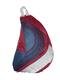

In [ ]:
resized_image_1

In [ ]:
rec_images_1 = []
for i in path_images_1:
    pil_image = Image.open(i)
    image_array = np.array(pil_image)
    resized_image = cv2.resize(image_array, IMAGE_SIZE)
    rec_images_1.append(resized_image)

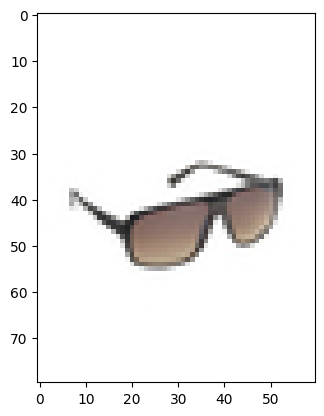

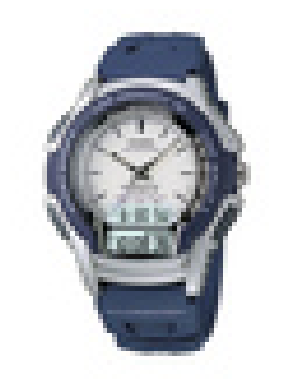

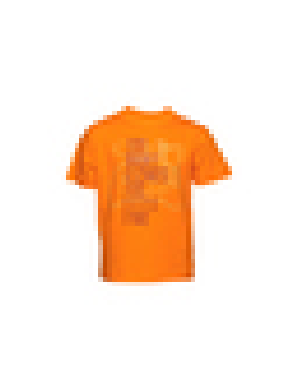

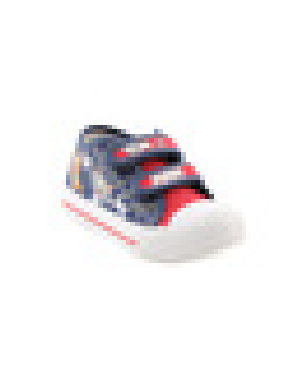

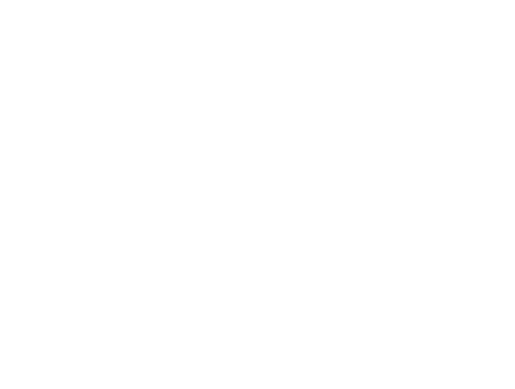

In [ ]:
for i in rec_images_1:
    plt.imshow(i)
    plt.show()
    plt.axis("off")

In [ ]:
random_ids = [(77811,11275),(47858,47452),(57381,36723),(35260,21251),(46877,58931),(92240,25754),(83005,16147),(63088,45324),(97050,44974),(67684,6801)]

In [ ]:
# Example usage:
for i in random_ids:
  user_id = i[0]
  item_id = i[1]
  recommended_items = recommend_outfit_items(user_id, item_id, processed_dataset, user_item_matrix, user_similarity_df, encoded_complementary_map)
  print("Recommended items:", recommended_items)
  path_images_1 = []
  image_url = "/content/your_image_directory/images/"
  for i in recommended_items:
    path_images_1.append(image_url + data[data.id==i]['filename'].values[0])
  path_images_1
  image_path_1 = f"/content/your_image_directory/images/{item_id}.jpg"

  pil_image_1 = Image.open(image_path_1)
  resized_image_1 = cv2.resize(np.array(pil_image_1), IMAGE_SIZE)

  print("Main item:")
  plt.imshow(resized_image_1)
  plt.axis("off")
  plt.show()

  print("Recommended items:")
  rec_images_1 = []
  for i in path_images_1:
      pil_image = Image.open(i)
      image_array = np.array(pil_image)
      resized_image = cv2.resize(image_array, IMAGE_SIZE)
      rec_images_1.append(resized_image)

  for i in rec_images_1:
      plt.imshow(i)
      plt.show()
      plt.axis("off")

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Sample test user recommendations and ground truth
def evaluate_recommendations(test_users, target_item_ids, df, user_item_matrix, user_similarity_df, complementary_map):
    all_y_true = []
    all_y_pred = []

    for user_id, target_item_id in zip(test_users, target_item_ids):
        recommended_items = recommend_outfit_items(
            user_id,
            target_item_id,
            df,
            user_item_matrix,
            user_similarity_df,
            complementary_map
        )

        # Get ground truth items for the user
        ground_truth_items = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index.tolist()

        # Construct binary vectors for evaluation
        recommendations_set = set(recommended_items)
        ground_truth_set = set(ground_truth_items)

        for item in ground_truth_set:
            all_y_true.append(1)
            all_y_pred.append(1 if item in recommendations_set else 0)

        for item in recommendations_set - ground_truth_set:
            all_y_true.append(0)
            all_y_pred.append(1)

    # Calculate metrics
    precision = precision_score(all_y_true, all_y_pred)
    recall = recall_score(all_y_true, all_y_pred)
    f1 = f1_score(all_y_true, all_y_pred)

    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')

# Example usage
test_users = [63707]  # Replace with actual test user IDs
target_item_ids = [17269]  # Replace with actual target item IDs

evaluate_recommendations(
    test_users,
    target_item_ids,
    processed_dataset,  # Your dataset containing item attributes
    user_item_matrix,   # Your matrix of user-item interactions
    user_similarity_df, # Your user similarity DataFrame
    encoded_complementary_map  # Your complementary subcategories map
)


Target Item: 17269, Subcategory: 10, Gender: 2, Usage: 0
Similar Users: [10371, 56357, 85088, 36062, 72991]
Recommended Outfit Items: [11265, 36911, 31833, 23716, 28922, 26637]
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


In [ ]:
def evaluate_recommendations_as_correct(test_users, target_item_ids, df, user_item_matrix, user_similarity_df, complementary_map):
    total_recommendations_possible = 0  # Total number of possible recommendations based on complementary list lengths
    correct_recommendations = 0  # Treat recommendations given by AI as "correct" recommendations

    for user_id, target_item_id in zip(test_users, target_item_ids):
        # Get the subcategory of the target item
        target_item_row = df[df['id'] == target_item_id].iloc[0]
        target_subcategory = target_item_row['subCategory']

        # Debug: Check target item and its subcategory
        print(f"User: {user_id}, Target Item ID: {target_item_id}, Target Subcategory: {target_subcategory}")

        # Generate recommendations for the user
        recommended_items = recommend_outfit_items(
            user_id,
            target_item_id,
            df,
            user_item_matrix,
            user_similarity_df,
            complementary_map
        )

        # Debug: Check the recommendations given by the AI
        print(f"Recommendations Given by AI: {recommended_items}")

        # Check if any recommendations were generated
        if recommended_items:
            correct_recommendations += len(recommended_items)
        else:
            print(f"No recommendations generated for User: {user_id}, Target Item ID: {target_item_id}")

        # Get the length of the complementary subcategory list for the target subcategory
        if target_subcategory in complementary_map:
            subcategory_length = len(complementary_map[target_subcategory])
            total_recommendations_possible += subcategory_length
            print(f"Possible Recommendations (from complementary map) for {target_subcategory}: {subcategory_length}")
        else:
            print(f"Warning: Target subcategory '{target_subcategory}' not found in complementary map!")

    # Debug: Check total possible and correct recommendations
    print(f"Total Recommendations Possible: {total_recommendations_possible}")
    print(f"Correct Recommendations (AI given): {correct_recommendations}")

    # Calculate precision
    if total_recommendations_possible > 0:
        precision = correct_recommendations / total_recommendations_possible
    else:
        precision = 0

    print(f'Precision: {precision:.2f}')



# Example usage
test_users = [63707]  # Replace with actual test user IDs
target_item_ids = [17269]  # Replace with actual target item IDs

evaluate_recommendations(
    test_users,
    target_item_ids,
    processed_dataset,  # Your dataset containing item attributes
    user_item_matrix,   # Your matrix of user-item interactions
    user_similarity_df, # Your user similarity DataFrame
    encoded_complementary_map  # Your complementary subcategories map
)


Target Item: 17269, Subcategory: 10, Gender: 2, Usage: 0
Complementary Subcategories: [2, 4, 8, 5, 3, 1, 0, 12, 11]
Similar Users: [10371, 56357, 85088, 36062, 72991]
Recommended Outfit Items: [11265, 36911, 31833, 23716, 28922, 26637]
Total Recommendations (based on complementary lists): 9
Correct Recommendations: 0
Precision: 0.00
